In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
url="https://drive.google.com/file/d/1VD06DjyGegNAWdJxFqKW-BtNsSbZsbez/view?usp=drive_link"
url = 'https://drive.google.com/uc?id='+ url.split('/')[-2]
ad = pd.read_csv(url)

In [6]:
X = ad.drop('sales' , axis=1)
y = ad['sales']

<h2><mark>PolynomialFeatures</mark></h2>

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(degree=3 , include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

<h2><mark>Scaling Data</mark></h2>

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
standar_scale = StandardScaler()
standar_scale.fit(X_train) # fit only on training to avoid data leakage

StandardScaler()

In [14]:
X_train = standar_scale.transform(X_train)
X_test = standar_scale.transform(X_test)

<h2><mark>LASSO REGRESSION</mark></h2>

In [16]:
from sklearn.linear_model import LassoCV

In [19]:
lasso = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso.fit(X_train , y_train)

LassoCV(cv=5, eps=0.1)

<code>eps</code><p>will search for the best alpha values in a range where the difference between consecutive alpha values is at most the given value</p>

<code>n_alpha</code><p>This means that during the cross-validation process, the algorithm will try n different values for the regularization parameter </p>

<code>cv</code><p>the dataset is divided into n equal-sized folds. The algorithm then iterates n times. In each iteration, one of the folds is held out as the validation set, and the model is trained on the remaining n-1 folds</p>

<ul>
    
</ul>

In [20]:
test_prediction = lasso.predict(X)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mae = mean_absolute_error(test_prediction,y_test)
mse = mean_squared_error(test_prediction,y_test)
rmse = np.sqrt(mse)
print(mae)
print(rmse)

0.6302901710051617
1.077439790239176


In [32]:
lasso.coef_
lasso.alpha_

0.48358593581782205

<Axes: xlabel='sales', ylabel='Count'>

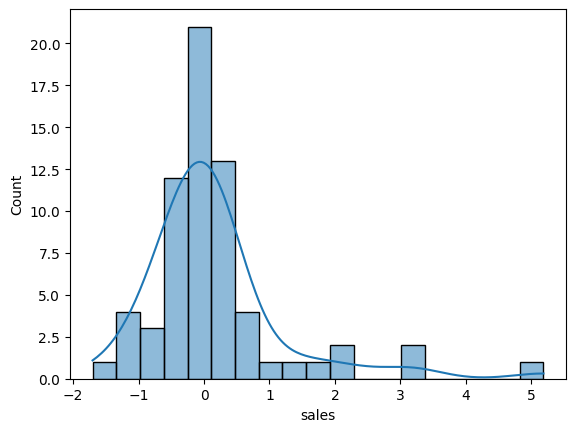

In [28]:
sns.histplot(data=test_prediction-y_test , kde=True)